# STAGE 2 DATA PRE-PROCESSING

## 1. IMPORT LIBRARY AND LOAD DATA

In [125]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap
# Library for Scalling Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import boxcox
import warnings
# Library for Split Data
from sklearn.model_selection import train_test_split
# Library for Z-Score
from scipy import stats
warnings.filterwarnings('ignore')
# plt.style.use('dark_background')

In [56]:
df = pd.read_csv('E commerce Train.csv')
df = df.drop(columns=['ID'])

In [3]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## 2. DATA CLEANSING

### A. Handle Missing Values

In [4]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Berdasarkan hasil diatas, **tidak ada datang yang hilang** sehingga tidak perlu ada proses lanjutan

### B. Handle Duplicated Data

In [5]:
df.duplicated().sum()

0

**tidak ada data yang duplikat**, sehingga tidak perlu ada proses lanjutan

### C. Handle Outliers

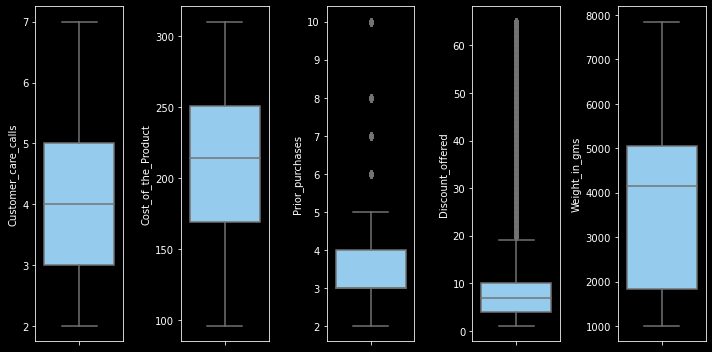

In [123]:
numericals = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
categoricals = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Customer_rating', 'Gender']

feat_num = numericals
plt.figure(figsize=(10,5))
for i in range(0, len(feat_num)):
    plt.subplot(1, len(feat_num), i+1)
    sns.boxplot(y=df[feat_num[i]], color='lightskyblue', orient='v')
    plt.tight_layout()

*Outliers* terdapat pada fitur 'Prior_purchases' dan 'Discount_offered'

#### Z-Scores

In [7]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Prior_purchases','Discount_offered']:
    z_scores = np.abs(stats.zscore(df[col]))
    filtered_entries = (z_scores < 2)
    
df_z = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_z)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 10000


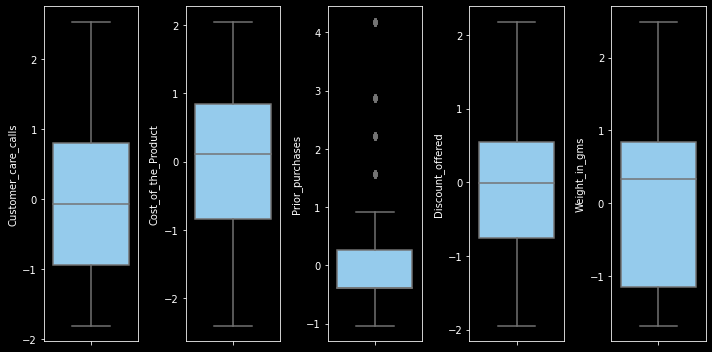

In [124]:
plt.figure(figsize=(10,5))
for i in range(0, len(feat_num)):
    plt.subplot(1, len(feat_num), i+1)
    sns.boxplot(y=df_z[feat_num[i]], color='lightskyblue', orient='v')
    plt.tight_layout()

Walaupun masih terdapat *outliers* pada fitur 'Prior_purchase' dan 'Discount_offered', namun karena sudah di filter menggunakan `Z_score` artinya *outliers* tersebut masih dalam batas wajar

In [9]:
df_z.shape

(10000, 11)

In [10]:
df_z.shape

(10000, 11)

### D. Feature Transformation

#### Log Transform

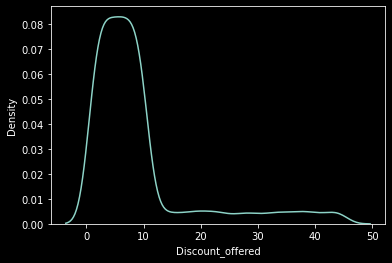

In [11]:
sns.kdeplot(df_z['Discount_offered'])
plt.show()

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

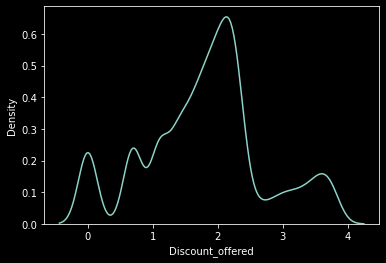

In [12]:
df_z['Discount_offered']= np.log(df_z['Discount_offered'])
sns.kdeplot(df_z['Discount_offered'])

In [13]:
df_z.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,3.784190,1233,1
3,B,Flight,3,3,176,4,medium,M,2.302585,1177,1
5,F,Flight,3,1,162,3,medium,F,2.484907,1417,1
6,D,Flight,3,4,250,3,low,F,1.098612,2371,1
8,A,Flight,3,4,150,3,low,F,2.397895,1861,1


#### Standardization

In [14]:
for col in feat_num:
    df_z[col]= StandardScaler().fit_transform(df_z[col].values.reshape(len(df_z), 1))

In [15]:
df_z.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,6.135847e-15,2.991100,2.980505e-16,3.576694e-16,5.567221e-16,-7.300383e-16,0.556400
std,1.000050e+00,1.413584,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.496834
min,-1.818539e+00,1.000000,-2.407225e+00,-1.043269e+00,-1.952479e+00,-1.686532e+00,0.000000
25%,-9.479249e-01,2.000000,-8.450480e-01,-3.898374e-01,-7.594359e-01,-1.150271e+00,0.000000
50%,-7.731055e-02,3.000000,1.130870e-01,-3.898374e-01,-6.709511e-03,3.375426e-01,1.000000
75%,7.933038e-01,4.000000,8.421028e-01,2.635944e-01,5.480239e-01,8.441722e-01,1.000000
max,2.534533e+00,5.000000,2.050186e+00,4.184185e+00,2.181384e+00,2.495415e+00,1.000000


### E. Feature Encoding

#### Label

In [16]:
mapping_gender = {'F' : 1,
                  'M' : 0}
mapping_product = {'low' : 0,
                   'medium' : 1,
                   'high': 2}

df_z['Gender'] = df_z['Gender'].map(mapping_gender)
df_z['Product_importance'] = df_z['Product_importance'].map(mapping_product)

In [17]:
df_z.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
5428,C,Ship,0.793304,2,-1.886499,0.917026,1,1,0.548024,0.628354,0
8764,C,Flight,-0.077311,1,-1.157483,-1.043269,1,0,-0.447026,0.894117,0
3642,D,Ship,-0.077311,4,-0.136861,0.263594,0,1,-0.006710,0.795754,0
5095,F,Ship,-0.947925,4,0.654642,-1.043269,1,0,-1.952479,1.269851,1
697,F,Flight,-0.947925,5,-1.261628,-1.043269,0,1,1.058427,-1.429322,1


#### One-Hot

In [18]:
one_hot = pd.get_dummies(df_z['Mode_of_Shipment'], prefix='mode')
df_z = df_z.join(one_hot)
df_z = df_z.drop(columns='Mode_of_Shipment')

In [19]:
one_hot2 = pd.get_dummies(df_z['Warehouse_block'], prefix='warehouse_block')
df_z = df_z.join(one_hot2)
df_z = df_z.drop(columns='Warehouse_block')
df_z.sample(5)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,mode_Flight,mode_Road,mode_Ship,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F
2896,-1.818539,2,-0.803390,-1.043269,1,0,1.876989,-1.335847,1,0,0,1,0,0,1,0,0
4536,-0.077311,2,1.133709,-0.389837,2,0,-1.952479,1.081679,1,1,0,0,0,0,0,1,0
5194,-0.077311,2,1.050393,-0.389837,0,1,0.433607,0.720608,0,0,1,0,0,0,1,0,0
1637,0.793304,4,-1.490748,0.263594,2,1,-0.204702,-1.607719,1,0,1,0,0,0,0,0,1
3212,-0.077311,5,0.654642,-0.389837,0,1,-1.199753,0.701057,0,0,0,1,1,0,0,0,0


#### Class Imbalance

In [20]:
df_z['Reached.on.Time_Y.N'].value_counts() 

1    5564
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

Berdasarkan derajat ketimpangan data, rasio fitur 'Reached.on.Time' tidak termasuk kedalam kategori **imbalance**

## 2. FEATURE ENGINEERING

#### A. Feature selection

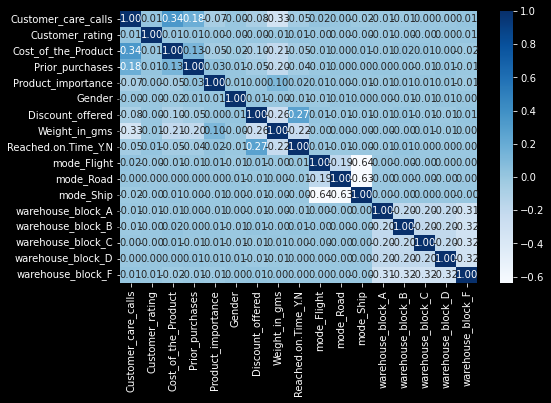

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(df_z.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

- Saat ini semua fitur akan digunakan karena fitur yang ada saat ini tidak banyak
- Tidak ada fitur yang redundan, sehingga tidak perlu ada fitur yang di drop
- Fitur warehouse menjadi terlalu banyak setelah dilakukan `one hot encoding` dan tidak memiliki korelasi yang baik dengan target, sehingga fitur warehouse tidak akan digunakan

# STAGE 3 ML MODELING AND EVALUATION

## 1. MODELING

### A. Data Splitting

In [22]:
from sklearn.model_selection import train_test_split
X = df_z.drop(columns=['Reached.on.Time_Y.N', 'warehouse_block_A', 'warehouse_block_B', 'warehouse_block_C', 'warehouse_block_D', 'warehouse_block_F'])
y = df_z['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered',
       'Weight_in_gms', 'mode_Flight', 'mode_Road', 'mode_Ship'],
      dtype='object')

In [10]:
print(X_train.shape)
print(X_test.shape)

NameError: name 'X_train' is not defined

### B. Modeling

In [24]:
# Import Library

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [25]:
# Create function to fit model & model evaluation
def fit_evaluation(Model, X_train, y_train, X_test, y_test):
    model = Model # initiate model
    model.fit(X_train, y_train) # fit the model
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    train_score = model.score(X_train, y_train) 
    test_score = model.score(X_test, y_test)
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True) # Cross Validate
    return round(test_score,2), round(precision_score(y_test, y_pred),2), \
           round(precision_score(y_train, y_pred_train),2),round(recall_score(y_test, y_pred),2), \
           round(f1_score(y_test, y_pred),2), round(roc_auc_score(y_test, y_pred_proba[:, 1]),2), \
           round(roc_auc_score(y_train, y_pred_proba_train[:, 1]),2), round((score['test_score'].mean()),2), \
           round((score['train_score'].mean()),2)

In [26]:
# Inititate algorithm
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, eval_metric = 'logloss')
knn = KNeighborsClassifier(n_neighbors=5)
ab = AdaBoostClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
clf = GaussianNB()


# Create function to make the result as dataframe 
def model_comparison_default(X,y):  
    
    # Logistic Regression
    lr_test_score, lrte_pr, lrtr_pr, lr_re, lr_f1, lrte_roc_auc, lrtr_roc_auc, lrte_roc_auc_cv, lrtr_roc_auc_cv = fit_evaluation(
        lr, X_train, y_train, X_test, y_test)
    # Decision Tree
    dt_test_score, dtte_pr, dttr_pr, dt_re, dt_f1, dtte_roc_auc, dttr_roc_auc, dtte_roc_auc_cv, dttr_roc_auc_cv = fit_evaluation(
        dt, X_train, y_train, X_test, y_test)
    # XGBoost
    xgb_test_score, xgbte_pr, xgbtr_pr, xgb_re, xgb_f1, xgbte_roc_auc, xgbtr_roc_auc, xgbte_roc_auc_cv, xgbtr_roc_auc_cv = fit_evaluation(
        xgb, X_train, y_train, X_test, y_test)
    # KNN
    knn_test_score, knnte_pr, knntr_pr, knn_re, knn_f1, knnte_roc_auc, knntr_roc_auc, knnte_roc_auc_cv, knntr_roc_auc_cv = fit_evaluation(
        knn, X_train, y_train, X_test, y_test)
    # AdaBoost
    ab_test_score, abte_pr, abtr_pr, ab_re, ab_f1, abte_roc_auc, abtr_roc_auc, abte_roc_auc_cv, abtr_roc_auc_cv = fit_evaluation(
        ab, X_train, y_train, X_test, y_test)
    # Random Forest
    rf_test_score, rfte_pr, rftr_pr, rf_re, rf_f1, rfte_roc_auc, rftr_roc_auc, rfte_roc_auc_cv, rftr_roc_auc_cv = fit_evaluation(
        rf, X_train, y_train, X_test, y_test)
    # Naive Bayes
    clf_test_score, clfte_pr, clftr_pr, clf_re, clf_f1, clfte_roc_auc, clftr_roc_auc, clfte_roc_auc_cv, clftr_roc_auc_cv = fit_evaluation(
        clf, X_train, y_train, X_test, y_test)
    
    
    
    models = ['Logistic Regression','Decision Tree','XGBoost','KNN','AdaBoost',
              'Random Forest','Naive Bayes']
    test_score = [lr_test_score, dt_test_score, xgb_test_score,
                  knn_test_score, ab_test_score, rf_test_score, clf_test_score]
    precision_test = [lrte_pr, dtte_pr, xgbte_pr, knnte_pr, abte_pr, rfte_pr, clfte_pr]
    precision_train = [lrtr_pr, dttr_pr, xgbtr_pr, knntr_pr, abtr_pr, rftr_pr, clftr_pr]
    recall = [lr_re, dt_re, xgb_re, knn_re, ab_re, rf_re, clf_re]
    f1 = [lr_f1, dt_f1, xgb_f1, knn_f1, ab_f1, rf_f1, clf_f1]
    roc_auc_test = [lrte_roc_auc, dtte_roc_auc, xgbte_roc_auc, knnte_roc_auc, abte_roc_auc, rfte_roc_auc, clfte_roc_auc]
    roc_auc_train = [lrtr_roc_auc, dttr_roc_auc, xgbtr_roc_auc, knntr_roc_auc, abtr_roc_auc, rftr_roc_auc, clftr_roc_auc]
    roc_auc_test_cv = [lrte_roc_auc_cv, dtte_roc_auc_cv, xgbte_roc_auc_cv, knnte_roc_auc_cv, abte_roc_auc_cv, rfte_roc_auc_cv, clfte_roc_auc_cv]
    roc_auc_train_cv = [lrtr_roc_auc_cv, dttr_roc_auc_cv, xgbtr_roc_auc_cv, knntr_roc_auc_cv, abtr_roc_auc_cv, rftr_roc_auc_cv, clftr_roc_auc_cv]
    
    model_comparison = pd.DataFrame(data=[models, test_score, 
                                          precision_test, precision_train, recall,
                                          f1, roc_auc_test, roc_auc_train,
                                          roc_auc_test_cv, roc_auc_train_cv]).T.rename({0: 'Model',
                                                                                        1: 'Accuracy',
                                                                                        2: 'Precision_Test',
                                                                                        3: 'Precision_Train',
                                                                                        4: 'Recall',
                                                                                        5: 'F1 Score',
                                                                                        6: 'ROC_AUC_Test',
                                                                                        7: 'ROC_AUC_Train',
                                                                                        8: 'ROC_AUC_Test_CV',
                                                                                        9: 'ROC_AUC_Train_CV'
                                                                                                              }, axis=1)
    
    return model_comparison

In [27]:
model_comparison_default(X, y)

,Model,Accuracy,Precision_Test,Precision_Train,Recall,F1 Score,ROC_AUC_Test,ROC_AUC_Train,ROC_AUC_Test_CV,ROC_AUC_Train_CV
0,Logistic Regression,0.59,0.62,0.63,0.69,0.65,0.67,0.67,0.65,0.67
1,Decision Tree,0.61,0.65,1.0,0.66,0.65,0.61,1.0,0.58,1.0
2,XGBoost,0.62,0.68,0.95,0.61,0.64,0.7,0.97,0.68,0.97
3,KNN,0.61,0.66,0.8,0.61,0.64,0.68,0.84,0.65,0.84
4,AdaBoost,0.65,0.77,0.78,0.53,0.63,0.71,0.72,0.67,0.72
5,Random Forest,0.62,0.68,1.0,0.59,0.63,0.69,1.0,0.68,1.0
6,Naive Bayes,0.61,0.66,0.66,0.62,0.64,0.68,0.68,0.65,0.68


Dari hasil evaluasi model, terdapat beberapa poin penting:
1. Accuracy paling tinggi didapat dengan menggunakan AdaBoost (0.65)
2. Precissio paling tinggi didapat dengan menggunakan AdaBoost, XGBoost, dan Random Forest (0.77; 0.68; 0.68)
3. Score ROC_AUC_CV paling tinggi didapat dengan menggunakan AdaBoost, XGBoost, dan RandomForest (0.67; 0.68; 0.68)
4. Recall paling tinggi didapat dengan menggunakan Logistic Regression dan Decision Tree (0.69; 0.66)
5. Model menggunakan RandomForest, XGBoost, DecisionTree, dan KNN mengalami overfitting


Terdapat beberapa catatan dari poin-poin evaluasi model:
1. Dengan mempertimbangkan target customer rating (customer memiliki experience yang lebih baik), dimana kesesuaian informasi mengenai datangnya pengiriman menjadi penting, maka dapat dilihat dari nilai *__----__*
2. Model menggunakan ---- digunakan karena memiliki nilai *__----__* paling tinggi, namun terdapat sedikit ketidakseimbangan antara nilai *recall* dan *precission*-nya sehingga perlu melakukan tune hyperparameter
3. Model dengan ---- bisa dijadikan pertimbangan juga

### C & D. Model Evaluation

In [28]:
# Create function for evaluation model
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    
    print('roc_auc (cv test):' + str(score['test_score'].mean()))
    print('roc_auc (cv train):' + str(score['train_score'].mean()))
    
    print(classification_report(y_test,y_pred))
    confusion_matrix = plot_confusion_matrix(model, X_test, y_test)

#### Decision Tree

Accuracy (Test Set): 0.61
Precision (Test Set): 0.65
Recall (Test Set): 0.66
F1-Score (Test Set): 0.65
roc_auc (test proba): 0.61
roc_auc (train proba): 1.00
roc_auc (cv test):0.5839381702599025
roc_auc (cv train):1.0
              precision    recall  f1-score   support

           0       0.56      0.55      0.56      1332
           1       0.65      0.66      0.65      1668

    accuracy                           0.61      3000
   macro avg       0.61      0.61      0.61      3000
weighted avg       0.61      0.61      0.61      3000



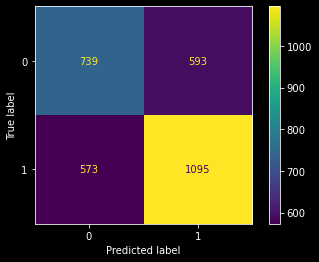

In [29]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
eval_classification(dt)

### E. Hyperparameter Tuning

Accuracy (Test Set): 0.61
Precision (Test Set): 0.66
Recall (Test Set): 0.61
F1-Score (Test Set): 0.63
roc_auc (test proba): 0.68
roc_auc (train proba): 0.82
roc_auc (cv test):0.661564272060468
roc_auc (cv train):0.878115422673919
              precision    recall  f1-score   support

           0       0.55      0.60      0.57      1332
           1       0.66      0.61      0.63      1668

    accuracy                           0.61      3000
   macro avg       0.60      0.60      0.60      3000
weighted avg       0.61      0.61      0.61      3000



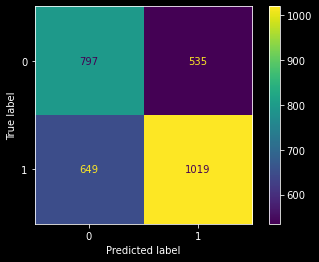

In [30]:
# Tuning hyperparameter

# Import library
from sklearn.model_selection import RandomizedSearchCV

# List parameters
hyperparameters = dict(max_depth = [int(x) for x in np.linspace(1, 110, num = 30)],
                       min_samples_split = [2, 5, 10, 100],
                       min_samples_leaf = [1, 2, 4, 10, 20, 50],
                       max_features = ['auto', 'sqrt'],
                       criterion = ['gini','entropy'],
                       splitter = ['best','random'])

# Init model
dt = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall', random_state=42)
dt_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(dt_tuned)

### 2. Feature Importance

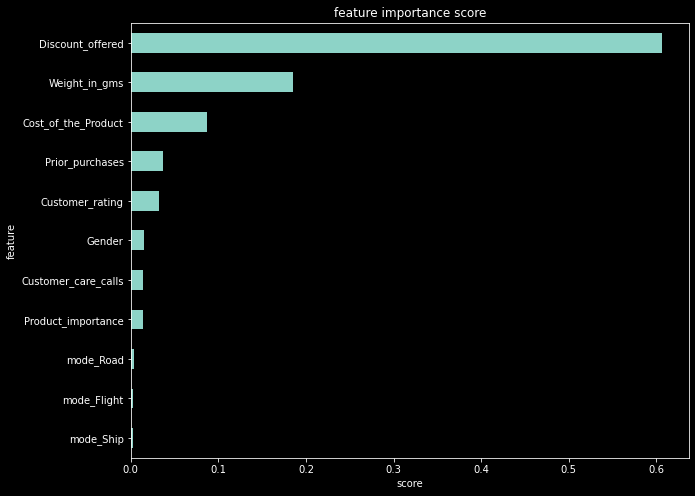

In [32]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
show_feature_importance(dt_tuned.best_estimator_)

3 Feature Importance teratas : <br>
1. Discount Offered
2. Weight in gms
3. Cost of Product

### Business Insight yang didapat

In [74]:
df_2 = pd.read_csv('E commerce Train.csv')
df_2 = df_2.rename(columns={'Reached.on.Time_Y.N' : 'is_late'})
df_2.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,is_late
4800,4801,D,Flight,7,1,291,4,low,M,2,1216,1
3326,3327,A,Ship,4,2,156,3,low,M,3,5923,0
9202,9203,C,Ship,4,5,136,2,medium,M,4,5512,0
9467,9468,F,Flight,3,4,191,3,medium,F,10,4667,0
4229,4230,F,Road,5,4,172,4,medium,F,10,4659,1


In [75]:
df_2['Discount_group'] = np.where(df_2['Discount_offered'] <= 10, '1-10',
                                   np.where(df_2['Discount_offered'] <= 20, '11-20',
                                   np.where(df_2['Discount_offered'] <= 30, '21-30',
                                   np.where(df_2['Discount_offered'] <= 40, '31-40', '>40')))) 

In [76]:
dfs = df_2.groupby(['Discount_group', 'is_late'])['ID'].nunique().reset_index(name='Customer')
dfs

,Discount_group,is_late,Customer
0,1-10,0,4436
1,1-10,1,3916
2,11-20,1,496
3,21-30,1,441
4,31-40,1,470
5,>40,1,1240


In [78]:
dfs2 = df_2.groupby(['Discount_group'])['ID'].nunique().reset_index(name='TotalCustomer')
dfs2

,Discount_group,TotalCustomer
0,1-10,8352
1,11-20,496
2,21-30,441
3,31-40,470
4,>40,1240


In [80]:
dfs3 = dfs.merge(dfs2,
                 left_on='Discount_group',
                 right_on='Discount_group',
                 how='inner')

In [81]:
dfs3['PercentageCustomer'] = round(dfs3['Customer']*100/dfs3['TotalCustomer'],2)
dfs3

,Discount_group,is_late,Customer,TotalCustomer,PercentageCustomer
0,1-10,0,4436,8352,53.11
1,1-10,1,3916,8352,46.89
2,11-20,1,496,496,100.00
3,21-30,1,441,441,100.00
4,31-40,1,470,470,100.00
5,>40,1,1240,1240,100.00


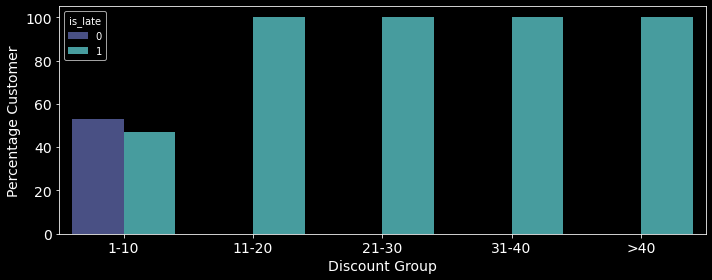

In [85]:
plt.figure(figsize = (10,4))
sns.barplot(data=dfs3, x = 'Discount_group', y = 'PercentageCustomer', hue = 'is_late', palette='mako')
plt.xlabel('Discount Group', fontsize = 14)
plt.ylabel('Percentage Customer', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

In [91]:
df_2['weight_group'] = np.where(df_2['Weight_in_gms'] < 2001, '< 2kg', 
                                          np.where(df_2['Weight_in_gms'] < 5001, '2-5kg', '> 5kg') )

In [92]:
df_2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,is_late,Discount_group,weight_group
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,>40,< 2kg
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,>40,2-5kg
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,>40,2-5kg
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,1-10,< 2kg
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,>40,2-5kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,1-10,< 2kg
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,1-10,< 2kg
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,1-10,< 2kg
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,1-10,< 2kg


In [98]:
df_w = df_2.groupby(['weight_group', 'is_late'])['ID'].nunique().reset_index(name='Customer')
df_w

,weight_group,is_late,Customer
0,2-5kg,0,1734
1,2-5kg,1,3131
2,< 2kg,0,1046
3,< 2kg,1,2199
4,> 5kg,0,1656
5,> 5kg,1,1233


In [99]:
df_w2 = df_2.groupby(['weight_group'])['ID'].nunique().reset_index(name='TotalCustomer')
df_w2

,weight_group,TotalCustomer
0,2-5kg,4865
1,< 2kg,3245
2,> 5kg,2889


In [100]:
df_w

,weight_group,is_late,Customer
0,2-5kg,0,1734
1,2-5kg,1,3131
2,< 2kg,0,1046
3,< 2kg,1,2199
4,> 5kg,0,1656
5,> 5kg,1,1233


In [101]:
df_w3 = df_w.merge(df_w2,
                 left_on='weight_group',
                 right_on='weight_group',
                 how='inner')

In [126]:
df_w3['PercentageCustomer2'] = round(df_w3['Customer']*100/df_w3['TotalCustomer'],2)
df_w3

,weight_group,is_late,Customer,TotalCustomer,PercentageCustomer2
0,2-5kg,0,1734,4865,35.64
1,2-5kg,1,3131,4865,64.36
2,< 2kg,0,1046,3245,32.23
3,< 2kg,1,2199,3245,67.77
4,> 5kg,0,1656,2889,57.32
5,> 5kg,1,1233,2889,42.68


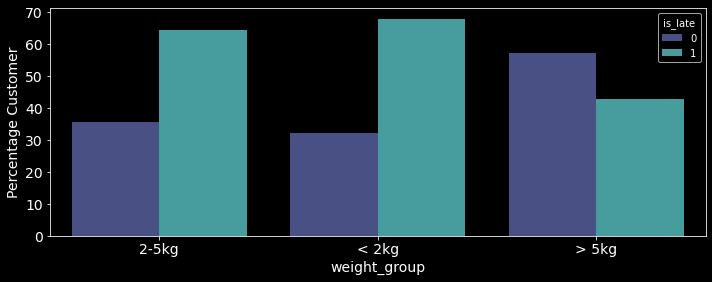

In [127]:
plt.figure(figsize = (10,4))
sns.barplot(data=df_w3, x = 'weight_group', y = 'PercentageCustomer2', hue = 'is_late', palette='mako')
plt.xlabel('weight_group', fontsize = 14)
plt.ylabel('Percentage Customer', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

In [111]:
df2.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,is_late
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


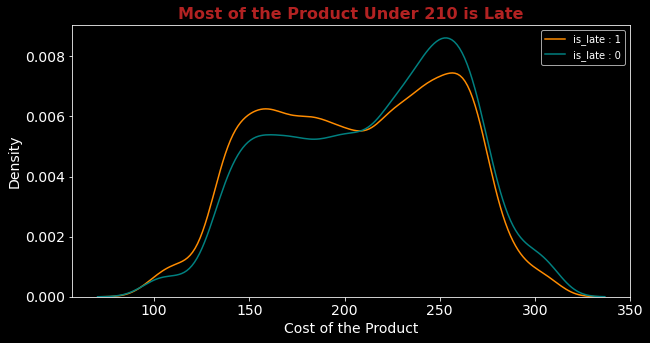

In [121]:
fig, ax = plt.subplots(figsize=(10,5))

sns.kdeplot(df_2[df_2['is_late'] == 1]['Cost_of_the_Product'].dropna(), color='darkorange', label = 'is_late : 1', ax=ax)
sns.kdeplot(df_2[df_2['is_late'] == 0]['Cost_of_the_Product'].dropna(), color='teal', label = 'is_late : 0', ax=ax)
plt.legend()
plt.title('Most of the Product Under 210 is Late',color='firebrick',fontsize=16,fontweight='semibold')
plt.xlabel('Cost of the Product', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

### Rekomendasi